In [1]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
# import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
# gmaps.configure(api_key=gkey)

In [2]:
# Generating random Brewery IDs

brewery_id = []

for x in range(100):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Generated {len(unique_id)} unique Brewery IDs.")

Generated 100 unique Brewery IDs.


In [3]:
# Retrieving Raw Brewery Data
raw_brewery_data = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        raw_brewery_data.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/100) Retrieved Brewery ID 2950...
(2/100) Retrieved Brewery ID 5899...
(3/100) Retrieved Brewery ID 4156...
(4/100) Retrieved Brewery ID 4699...
(5/100) Retrieved Brewery ID 3998...
(6/100) Retrieved Brewery ID 3243...
(7/100) Retrieved Brewery ID 5118...
(8/100) Retrieved Brewery ID 2263...
(9/100) Retrieved Brewery ID 1207...
(10/100) Retrieved Brewery ID 2022...
(11/100) Retrieved Brewery ID 4686...
(12/100) Retrieved Brewery ID 3073...
(13/100) Retrieved Brewery ID 5678...
(14/100) Retrieved Brewery ID 3513...
(15/100) Retrieved Brewery ID 4994...
(16/100) Retrieved Brewery ID 2824...
(17/100) Retrieved Brewery ID 1033...
(18/100) Retrieved Brewery ID 2786...
(19/100) Retrieved Brewery ID 5472...
(20/100) Retrieved Brewery ID 2203...
(21/100) Retrieved Brewery ID 4833...
(22/100) Retrieved Brewery ID 1367...
(23/100) Retrieved Brewery ID 229...
(24/100) Retrieved Brewery ID 1425...
(25/100) Retrieved Brewery ID 749...
(26/100) Retrieved Brewery ID 4172...
(27/100) Retrieved Brew

In [4]:
# Creating DataFrame
brewery_df = pd.DataFrame(raw_brewery_data)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,planning,Saint Francisville,United States,2950,None,None,High Ground Brewery,2254457436,70775-2431,Louisiana,,2018-08-11T21:37:29.236Z,
1,micro,Corvallis,United States,5899,44.5612822,-123.2608445,Oregon Trail Brewery,5417583527,97333-4640,Oregon,341 SW 2nd St,2018-08-24T16:03:55.712Z,http://www.oregontrailbrewery.com
2,brewpub,Bozeman,United States,4156,45.6841878888889,-111.025560977778,Mountains Walking,4062193480,59718,Montana,422 N Plum Ave,2018-08-24T00:47:21.915Z,http://www.mountainswalking.com
3,micro,Syracuse,United States,4699,43.0701121,-76.0980832,Eastwood Brewing Company,,13206-2357,New York,108 Walter Dr,2018-08-24T15:38:46.242Z,http://www.facebook.com/eastwoodbrewingcompany
4,contract,Saint Louis,United States,3998,38.6394897,-90.2439837,Cathedral Square Brewery,3148033605,63108-3204,Missouri,3914 Lindell Blvd,2018-08-24T00:46:18.987Z,http://www.cathedralsquarebrewery.com


In [5]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 46 breweries from DataFrame which did not have coordinates.
Total Brewery count: 54


In [6]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
1,44.561282,-123.260845
2,45.684188,-111.025561
3,43.070112,-76.098083
4,38.639490,-90.243984
6,36.003107,-78.899594


In [64]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [7]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [8]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/54) Corvallis weather data found...
(2/54) Bozeman weather data found...
(3/54) Syracuse weather data found...
(4/54) Saint Louis weather data found...
(5/54) Durham weather data found...
(6/54) Athens weather data found...
(7/54) Whitehall weather data found...
(8/54) Beaver weather data found...
(9/54) San Jose weather data found...
(10/54) Cedar Rapids weather data found...
(11/54) Athens weather data found...
(12/54) Fayetteville weather data found...
(13/54) Denver weather data found...
(14/54) Clovis weather data found...
(15/54) Brooklyn weather data found...
(16/54) Pocatello weather data found...
(17/54) Holland weather data found...
(18/54) Lake George weather data found...
(19/54) Ponca City weather data found...
(20/54) Denver weather data found...
(21/54) Worcester weather data found...
(22/54) San Francisco weather data found...
(23/54) Asheville weather data found...
(24/54) Corning weather data found...
(25/54) Napa weather data found...
(26/54) Anaheim weather data 

In [9]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Corvallis,66.02
1,Bozeman,53.06
2,Syracuse,73.94
3,Saint Louis,64.40
4,Durham,57.20
5,Athens,84.02
6,Whitehall,80.96
7,Beaver,80.96
8,San Jose,77.37
9,Cedar Rapids,75.92


In [10]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/54) Found rating for Oregon Trail Brewery...
(2/54) Found rating for Mountains Walking...
(3/54) Found rating for Eastwood Brewing Company...
(4/54) Found rating for Cathedral Square Brewery...
(5/54) Found rating for Fullsteam Brewery...
(6/54) Found rating for Crossroads Brewing Co...
(7/54) Found rating for Fetch Brewing Co...
(8/54) Found rating for Beaver Brewery At Mo's Place...
(9/54) Could not find rating for South Bay Brewco...
(10/54) Found rating for Lion Bridge Brewing Company...
(11/54) Could not find rating for Terrapin Beer Co...
(12/54) Found rating for Columbus House Brewery...
(13/54) Could not find rating for Lady Justice Brewing Company...
(14/54) Found rating for Kings River Brewing Company...
(15/54) Found rating for Coney Island Beer...
(16/54) Found rating for Portneuf Valley Brewing Co...
(17/54) Found rating for Black Frog Brewing Co...
(18/54) Found rating for Adirondack Pub and Brewery...
(19/54) Found rating for Vortex Alley Brewery...
(20/54) Found rati

In [11]:
ratings_df = pd.DataFrame(ratings)
ratings_df

,name,rating
0,Oregon Trail Brewery,1.5
1,Mountains Walking,4.4
2,Eastwood Brewing Company,4.8
3,Cathedral Square Brewery,4.4
4,Fullsteam Brewery,4.6
5,Crossroads Brewing Co,4.3
6,Fetch Brewing Co,4.5
7,Beaver Brewery At Mo's Place,4.6
8,Lion Bridge Brewing Company,4.5
9,Columbus House Brewery,4.7


In [12]:
#Merging Data Frames
brewery_and_temp = brewery_df.merge(temp_df, how = 'outer', on = 'city') 
# brewery_and_temp
brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp', 'state']]
brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
dataset_clean1 = dataset_clean.drop_duplicates('name')
dataset_clean2 = dataset_clean1.set_index('name')
dataset_clean2

,brewery_type,city,temp,state,rating
name,,,,,
Oregon Trail Brewery,micro,Corvallis,66.02,Oregon,1.5
Mountains Walking,brewpub,Bozeman,53.06,Montana,4.4
Eastwood Brewing Company,micro,Syracuse,73.94,New York,4.8
Cathedral Square Brewery,contract,Saint Louis,64.40,Missouri,4.4
Fullsteam Brewery,micro,Durham,57.20,North Carolina,4.6
Crossroads Brewing Co,brewpub,Athens,84.02,New York,4.3
Fetch Brewing Co,micro,Whitehall,80.96,Michigan,4.5
Beaver Brewery At Mo's Place,brewpub,Beaver,80.96,Kansas,4.6
Lion Bridge Brewing Company,brewpub,Cedar Rapids,75.92,Iowa,4.5


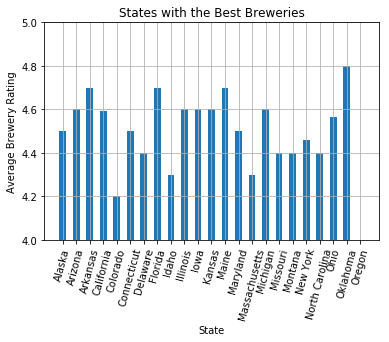

In [13]:
# Group DataFrame by State
group_by_state = dataset_clean2.groupby('state')

# Plot Average Rating By State
plt.bar(np.arange(0,len(group_by_state),1),height = group_by_state['rating'].mean(), tick_label = group_by_state['rating'].mean().index, width = 0.5)
plt.grid()
plt.title("States with the Best Breweries")
plt.xlabel("State")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 75)
plt.ylim(4,5)
plt.savefig("Average Brewery Rating vs State")


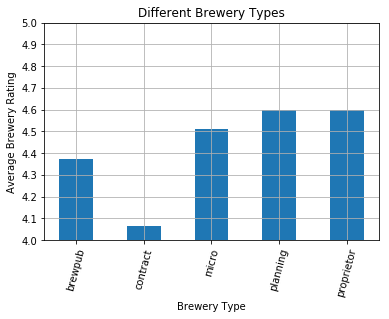

In [20]:
# Group DataFrame by Brewery Type
group_by_type = dataset_clean2.groupby('brewery_type')

plt.bar(np.arange(0,len(group_by_type),1),height = group_by_type['rating'].mean(), tick_label = group_by_type['rating'].mean().index, width = 0.5)
plt.grid()
plt.title("Different Brewery Types")
plt.xlabel("Brewery Type")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 75)
plt.yticks(np.arange(4,5.1,0.1))
plt.ylim(4,5)
plt.savefig("Average Brewery Rating vs Brewery Type")
